In [1]:
from graphviz import Source
from IPython.display import Image
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/Shareddrives/Data/밑바닥부터 시작하는 딥러닝

Mounted at /content/drive
/content/drive/Shareddrives/Data/밑바닥부터 시작하는 딥러닝


# Step 60 - LSTM

In [5]:
import numpy as np
import dezero
from dezero import Model
from dezero.dataloaders import SeqDataLoader
import dezero.functions as F
import dezero.layers as L

max_epoch = 100
batch_size = 30
hidden_size = 100
bptt_length = 30

train_set = dezero.datasets.SinCurve(train=True)
dataloader = SeqDataLoader(train_set, batch_size=batch_size)
seqlen = len(train_set)

class BetterRNN(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.rnn = L.LSTM(hidden_size)
        self.fc = L.Linear(out_size)

    def reset_state(self):
        self.rnn.reset_state()

    def forward(self, x):
        y = self.rnn(x)
        out = self.fc(y)
        return out


model = BetterRNN(hidden_size, 1)
optimizer = dezero.optimizers.Adam().setup(model)

for epoch in range(max_epoch):
    model.reset_state()
    loss, cnt = 0, 0

    for x, t in dataloader:
        y = model(x)
        loss += F.mean_squared_error(y, t)
        cnt += 1
        if cnt % bptt_length == 0 or cnt == seqlen:
            #dezero.utils.plot_dot_graph(loss)
            model.cleargrads()
            loss.backward()
            loss.unchain_backward()
            optimizer.update()

    avg_loss = float(loss.data) / cnt
    print(f'| eopch {epoch+1} | loss {avg_loss}')

| eopch 1 | loss 0.09383361721366039
| eopch 2 | loss 0.054631401953301
| eopch 3 | loss 0.03473270332766149
| eopch 4 | loss 0.03050141185015934
| eopch 5 | loss 0.03436745115809463
| eopch 6 | loss 0.038079046683415774
| eopch 7 | loss 0.03768262259001519
| eopch 8 | loss 0.033563577947477184
| eopch 9 | loss 0.027778218023494075
| eopch 10 | loss 0.02230095323285252
| eopch 11 | loss 0.018376998285339077
| eopch 12 | loss 0.016415037005633983
| eopch 13 | loss 0.016121606031780707
| eopch 14 | loss 0.016769046881845245
| eopch 15 | loss 0.017533589421142623
| eopch 16 | loss 0.017802009470666683
| eopch 17 | loss 0.017330272111305105
| eopch 18 | loss 0.016225477936663353
| eopch 19 | loss 0.014813437061058636
| eopch 20 | loss 0.013473437751294308
| eopch 21 | loss 0.012498393737311972
| eopch 22 | loss 0.012012650265152336
| eopch 23 | loss 0.011960428674342343
| eopch 24 | loss 0.012157722004992107
| eopch 25 | loss 0.012379095587725574
| eopch 26 | loss 0.012441518746890066
| eo

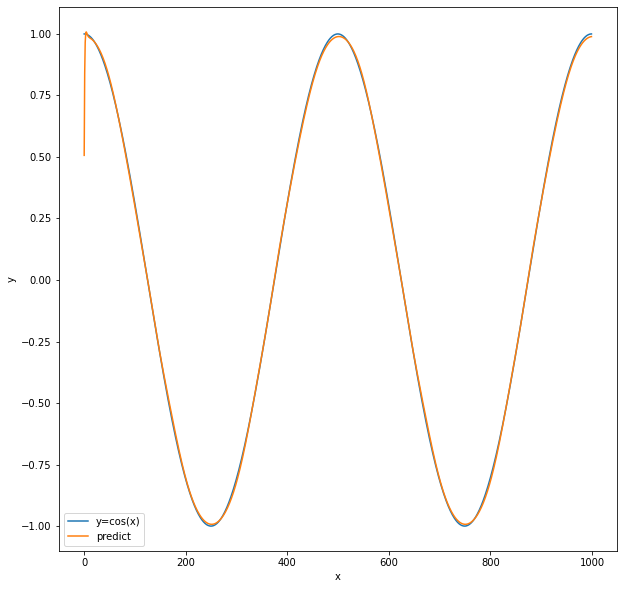

In [8]:
import matplotlib.pyplot as plt


xs = np.cos(np.linspace(0, 4*np.pi, 1000))
model.reset_state() # 모델 재설정
pred_list = []

plt.figure(figsize=(10,10))

with dezero.no_grad():
    for x in xs:
        x = np.array(x).reshape(1, 1)
        y = model(x)
        pred_list.append(float(y.data))

plt.plot(np.arange(len(xs)), xs, label='y=cos(x)')
plt.plot(np.arange(len(xs)), pred_list, label='predict')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()